<a href="https://colab.research.google.com/github/yywest/A-guide-to-Machine-Learning-in-R/blob/master/BnkDirecTarMk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import neighbors
import matplotlib.pyplot as plt
plt.rc("font" , size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="dark")                                                      #sns.set(style="white") 
sns.set(style="darkgrid", color_codes=True)                     # sns.set(style="whitegrid", color_codes=True)

In [51]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/banking_portu.csv',header=0)  
data = data.dropna()
print(data.shape)                                                            # (41188, 21)
print(list(data.columns))                                                  # ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',...,'y']
#print(data)

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [0]:
data.head()

In [0]:
data.info()                                                                       # show all columns name in dataset, data type ,total rec. of each columns and amount of null in each column 

In [0]:
data.describe()

In [0]:
data['education'].unique()                                                 #  Categories of education ; array(['basic.4y', 'unknown', 'university.degree', 'basic.6y',...], dtype=object)

In [0]:
# Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.
#-----------------------------------------------------------------------------------------------------------
data['education'] = np.where(data['education'] == 'basic.9y','basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.6y','basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.4y','basic',data['education'])
#-----------------------------------------------------------------------------------------------------------
# after grouping these columns  ; education group =  array(['basic', 'unknown', 'university.degree', 'high.school', 'professional.course', 'illiterate'], dtype=object)

In [53]:
# Data exploration
data['y'].value_counts()                                           # Name: y, dtype: int64 y value ; 0 = 36548  1=4640

0    36548
1     4640
Name: y, dtype: int64

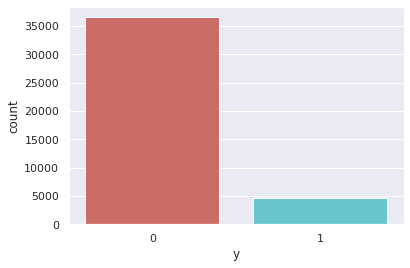

<Figure size 432x288 with 0 Axes>

In [0]:
sns.countplot (x='y' , data=data,palette='hls')           # palette='hls' about chart colors
plt.show()
plt.savefig('count_plot')                                           # show  detail   <Figure size 432x288 with 0 Axes>

In [55]:
count_no_sub = len(data[data['y']==0])                                      # count numbet of client not subcription   ; y value = 0
count_sub = len(data[data['y']==1])                                           # count number of client subcription        ; y value = 1

pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)          # 0.8873458288821987
pct_of_sub = count_sub/(count_no_sub+count_sub)                    # 0.11265417111780131
print("percentage of no subscription is", pct_of_no_sub*100)        # Percentage of no subscription is  88.73458288821988
print("percentage of subscription", pct_of_sub*100)                     # Percentage of  subscription is  11.265417111780131j

#'y' is imblalance ratio of no-subscription to subscription instances is 89:11 Before we go ahead to balance the classes, let’s do some more exploration.

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [56]:
data.groupby('y').mean()                                                                 # summary & calculate mean of each feature separate by  y = 0 and y =1 

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [0]:
data.groupby('job').mean()

In [0]:
data.groupby('marital').mean()

In [0]:
data.groupby('education').mean()

In [0]:
data.education.value_counts()

In [0]:
mod = data['education'].mode()
print(mod)

In [0]:
data.groupby('education').mean()

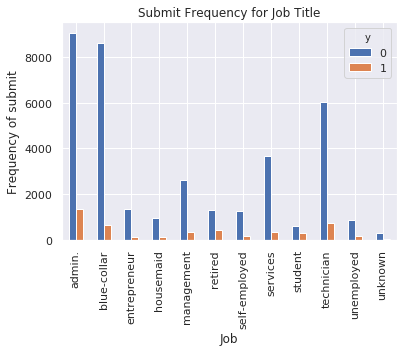

In [57]:
# Data Visualize
%matplotlib inline
#pd.crosstab(data.job,data.y).plot(kind='bar',stacked=True)
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Submit Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of submit')                                    # The frequency of purchase of the deposit depends a great deal on the job title
plt.savefig('Sub_Freq_job')                                           #  job title can be a good predictor of the outcome variable.


In [0]:
table= pd.crosstab(data.marital,data.y)
table.div(table.sum(1) .astype(float), axis=0).plot(kind= 'bar',stacked=True)
plt.title('Stacked Bar Chart of Submit frequency vs Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customer')
plt.savefig('Marital_VS_Purchas_Stack')                            #The marital status does not seem a strong predictor for the outcome variable.

In [0]:
table= pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stack bar char of Education VS Purchase')
plt.xlabel('Edution')
plt.ylabel('Proportion of customers')
plt.savefig('Edu_vs_Purs_stack')                                       # Education seems a good predictor of the outcome variable.

In [0]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')                                      # Day of week may not be a good predictor of the outcome

In [0]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')                                      # Month might be a good predictor of the outcome variable

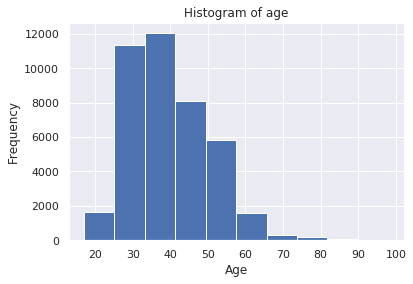

In [59]:
data.age.hist()
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('Hist_age')                             # Most of the customers of the bank in this dataset are in the age range of 30–40.

In [0]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of purchase')
plt.savefig                                              # Poutcome seems to be a good predictor of the outcome variable.

In [0]:
print(data)

In [0]:
 # test section ------------------------------------------------------------------------------------------------------------------------------------------------
 # Create DUMMY variablesc , these variables have only 2 values 0 & 1
# get dummy columns automatic fill the value (0,1) up to the real value of main column 
#      ex. : column marital if value = 'single'  the dimmy column of marital_single will keep value = 1 
#              and another columns such as  marital_married and marital_divorced will keep value = 0
#001  we should assign column name for  dummy column ,if not the dummy column name will show the name like it's own value
#       ex. if dummy column keep value  yes,no , 0,1  the column name will be  yes,no, 0,1 that make suffer
#003  data_vars =  ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',...,'y', 'job_admin.', 'job_blue-collar',
#                            'job_entrepreneur', ..., 'poutcome_nonexistent', 'poutcome_success']

dummy_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in dummy_list :
     dum_var = 'var' + '_' + var                                                       #001  ; var_job,var_marital,var_education,...,var_day_of_week,var_poutcome, more description above
 #    print('dum_var = ', dum_var)
     dum_var = pd.get_dummies(data[var],prefix=var)                     #002  ; create new dummy column that column name begin with the original name  and fill the content data ; get category in the main column
#    print('dum_var_data  = ', dum_var)
     data_join = data.join(dum_var)
#  print('dataJoin = ',data_join)
     data   = data_join
#cat_vars   =['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']    
#data_vars = data.columns.values.tolist()
#to_keep = [i for i in data_vars if i not in cat_vars]
dummy_list = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
dataJoin_col =  data.columns.values.tolist()
to_keep = [i for i in dataJoin_col if i not in dummy_list]                    #  original col.name (except main col. of dummy ) + dummy col.name


In [0]:
#Create DUMMY variables 
#That is variables with only two values, zero and one.

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [61]:
# Final data columns will be:
#-----------------------------------
data_final = data[to_keep]                         # all data_final 41188 rows * 62 cols. = original col. except root of dummy col + dummy col.
data_final.columns.values                          # array of col.name array(['age', 'duration', 'campaign', 'pdays', ...  'job_admin.', 'job_blue-collar',..., 'poutcome_success'], dtype=object)
#---------------------------------
#print(data_final)                                        # print col.name and content data

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [0]:
# selec columns
#-------------------------------------------------------------
X = data_final.loc[:,data_final.columns != 'y']                         # .loc =show all row [:] from row 0 to end. Select require col. & contain data by condition in [,,,]  ; x = data_final exclude column nane 'y'
y = data_final.loc[:,data_final.columns == 'y' ]                       # y = data_final only data in column name 'y'
#-------------------------------------------------------------
#print(y)

In [0]:
# Over sampling ; SMOTE in python (Synthetic Minority Oversampling Technic)
# with our training data created, I'll up-sample the no-subscription using the smote algorthm
# At a high level,SMOTE:
#1. Works by creating synthetic samples from the minor class (no-subscription) instread of creating copies
#2.Randomly choosing one of the k-nearest-neighbors and  using it to create a similar.but randomly tweaked, new observatio
# (Synthetic Minority Oversampling Technique)
#-------------------------------------------------------------------------------

In [0]:
#  SMOTE fx. &  split data
#--------------------------------------------------------------------------------------------------------
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)                                                                                            #SMOTE(k_neighbors=5, kind='deprecated', ... ,svm_estimator='deprecated')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)             # split train test = 70:30
columns = X_train.columns                                                                                                 # X_train.columns  = 61 cols. exclude y column
#--------------------------------------------------------------------------------------------------------

X_train =  data in X that has  61 cols exclude col. 'y'  and has 28831 = 70%                    of all 41188 rows 
X_test  =  data in X that has  61 cols exclude col. 'y'  and has 12357 = 30%                    of all 41188 rows 
y_train  =  data in y that has  1 col. is 'y'  and has 28831 = 70%                               of all 41188 rows 
y_test   =  data in y that has  1 col. is 'y'  and has 12357 = 30%                               of all 41188 rows 

In [64]:
# -------------  Make the over sampling data fit to Train data ;  use  Fx.  .fit_sample  ----------- **** 

os_data_X, os_data_y = os.fit_sample(X_train,y_train)                           

# ----------------------------------------------------------------------------------------------------------------- **** 
#        X_train  =  28831 rows,   61 cols.                        y_train =  28831 rows,   1 col.     contain data in decimal (integer) format
#   os_data_x  =  51134 rows (gen. over sampling),    os_data_y  =  51134 rows               contain data in format 3.00000000e+02, floating point or else

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
# os_data_X ;  call Fx. pd.DataFrame --> content data converse to normal number (decimal,integer,.. )

#--------------------------------------------------------------------------------
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_y = pd.DataFrame(data= os_data_y,columns=['y'])

In [66]:
# we can Check the numbers of our data
print('length of oversampled data is ' ,len(os_data_X))
print('Number of no subscription in oversampled data ', len(os_data_y[os_data_y['y'] == 0] ))
print('Number of subscription ',len(os_data_y[os_data_y['y'] == 1] ))
print('Proportion of no subscription data in oversanpled data is ',len(os_data_y[os_data_y['y'] == 0]) / len(os_data_X))
print('Proportion of subscription data in oversamplled data is ', len(os_data_y[os_data_y['y']==1]) / len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data  25567
Number of subscription  25567
Proportion of no subscription data in oversanpled data is  0.5
Proportion of subscription data in oversamplled data is  0.5


In [67]:
# Recursive Feature Elimination (RFE)
# is based on the idea to repeatedly construct a model and choose either the best or worst performing feature
# The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

#----------------------------------------------------------------
data_final_vars=data_final.columns.values.tolist()                     # data_final_vars = 62 members  ['age', 'duration', 'campaign', 'pdays',..,'y',... 'poutcome_success']
y=['y']
X=[i for i in data_final_vars if i not in y]                                 
#---------------------------------------------------------------

print('len X = ',len(X),',' ,'X  = ',X)                                            # len X =  61 X  =  ['age', 'duration', 'campaign', ..., 'poutcome_success'] except 'y'


len X =  61 , X  =  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_fa

In [68]:
from sklearn.feature_selection import  RFE
from sklearn.linear_model import  LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg,20)                                                                     # feature_to_select = 20
# print('ref = ',rfe)
rfe = rfe.fit(os_data_X,os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False  True  True False False False False  True False
 False  True False  True False False  True False False False False False
 False False  True False False False False False False  True False False
 False False False False False False  True False False False  True  True
  True  True  True  True  True False  True False False  True  True False
  True]
[30 32  8 39  1  1 24 40 35 25  1 21 14  1 36  1 12 20  1 13  4 28 18 27
 10 41  1 29 34 31  5  9  7  1 42 11 23 33 17 22 26 15  1  3  2 37  1  1
  1  1  1  1  1 19  1  6 16  1  1 38  1]


In [0]:
# Duplicate code Pls. don't run this section
# summary  REcursive Feature Elimination 
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_) 

In [0]:
# selected feature output from Recursive Feature Elimination (RFE)

cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X = os_data_X[cols]
y = os_data_y['y']     

In [70]:
# Implementing the model
#-------------------------------------------
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
#-------------------------------------------

# The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them. 0.9976 ,0.9979,0.9977

         Current function value: 0.545904
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.212     
Dependent Variable:      y                    AIC:                  55868.4619
Date:                    2020-02-17 11:49     BIC:                  56045.3060
No. Observations:        51134                Log-Likelihood:       -27914.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m         

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [71]:
# The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them. 
# default_no  = 0.9976 , ,default_unknow =  0.9977, contact_cellular=  0.9979, contact_telephone = 0.9979
#-------------------------------------------------------------------
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
         'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
         'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"]
X=os_data_X[cols]
y=os_data_y['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())
#-------------------------------------------------------------------------------------------------------------------      

Optimization terminated successfully.
         Current function value: 0.555890
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   y                 AIC:               56881.7793
Date:                 2020-02-17 11:50  BIC:               57023.2546
No. Observations:     51134             Log-Likelihood:    -28425.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6838 0.0000 -0.4632 -0.4343
job_blue-collar 

In [72]:
#----------------- Logistic Regression Model Fitting

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)            # X,y = 51134,  X_train,y_train=35793,  X_test,y_test=15341
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
#------------Predicting the test set results and calculating the accuracy 
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [74]:
#----------- Confusion Matrix ------------------
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#The result is telling us that we have 6124+5169 correct predictions and 2505+1542 incorrect predictions.

[[6124 1542]
 [2506 5169]]


In [0]:
#-------------- Compute precision, recall, F-measure and support
# To quote from Scikit Learn
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
# The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples.
# The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, 
#        where an F-beta score reaches its best value at 1 and worst score at 0.
# The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
# The support is the number of occurrences of each class in y_test.

In [75]:
#-------------- Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7666
           1       0.77      0.67      0.72      7675

    accuracy                           0.74     15341
   macro avg       0.74      0.74      0.74     15341
weighted avg       0.74      0.74      0.74     15341



In [0]:
# Interpretation: Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. 
# Of the entire test set, 74% of the customer’s preferred term deposits that were promoted.

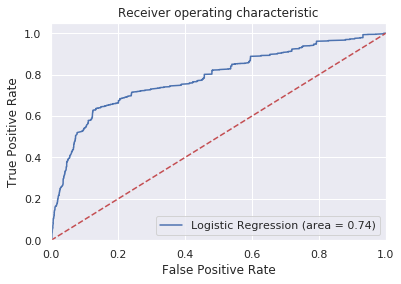

In [76]:
# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
# The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. 
# The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible 
# (toward the top-left corner)

In [0]:
# sample code
k = 0
j = 0
for i in os_data_X:
   if i == 'y' :
      k =  k + 1
      exit
   else :
      j = j + 1
      print(j,' = ', i)
print('y= ' , k , ', not y = ', j)

In [0]:
 from imblearn.over_sampling import SMOTE
 os = SMOTE(random_state=0)

In [0]:
# Over sampling ; SMOTE in python (Synthetic Minority Oversampling Technic)
# with our training data created, I'll up-sample the no-subscrition using the smote algorthm
# At a high level,SMOTE:
#1. Works by creating synthetic samples from the minor class (no-subscription) instread of creating copies
#2.Randomly choosing one of the k-nearest-neighbors and  using it to create a similar.but randomly tweaked, new observations.

x = data_final.loc[: , data_final.columns != 'y']
y = data_final.loc[: , data_final.columns == 'y']

from imblearn.over_sampling import  SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_tran, y_test = train_test_split(X,y,test_size=0.3, random_state=0)
columns = X_train.columns 

In [0]:
from imblearn.over_sampling import SMOTE
os  = SMOTE(random_state=0)
print(os)

SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')


In [0]:
#The list of effective features
cols=[]
i= 0
f=sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), data_final))
for c in f:
cols.append(c[1])